<a href="https://colab.research.google.com/github/kadirdundar/GlobalAIHubSummerCamp/blob/main/tf_project_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import pickle

import numpy as np
import cv2 as cv

import tensorflow as tf

from google.colab.patches import cv2_imshow

# Operations on a single image

In [ ]:
path_to_image = "/content/drive/MyDrive/transfer_learning/catsanddogs/PetImages/Cat/14.jpg"

In [ ]:
image = cv.imread(path_to_image, cv.IMREAD_COLOR)

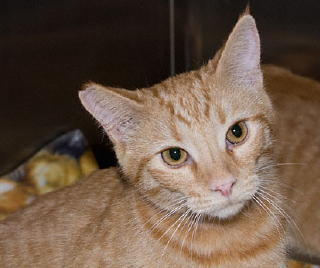

In [ ]:
cv2_imshow(image)

In [ ]:
type(image)

numpy.ndarray

In [ ]:
image

array([[[ 17,  18,  22],
        [ 16,  17,  21],
        [ 16,  17,  21],
        ...,
        [ 22,  23,  27],
        [ 22,  23,  27],
        [ 22,  23,  27]],

       [[ 17,  18,  22],
        [ 16,  17,  21],
        [ 16,  17,  21],
        ...,
        [ 22,  23,  27],
        [ 22,  23,  27],
        [ 22,  23,  27]],

       [[ 17,  18,  22],
        [ 16,  17,  21],
        [ 16,  17,  21],
        ...,
        [ 23,  24,  28],
        [ 22,  23,  27],
        [ 22,  23,  27]],

       ...,

       [[ 66, 100, 130],
        [ 71, 102, 133],
        [ 70, 101, 132],
        ...,
        [ 86,  88,  99],
        [ 75,  79,  90],
        [ 65,  68,  82]],

       [[ 67, 101, 131],
        [ 72, 103, 134],
        [ 72, 103, 134],
        ...,
        [119, 115, 126],
        [104, 102, 114],
        [ 91,  88, 103]],

       [[ 74, 108, 138],
        [ 78, 109, 140],
        [ 77, 108, 139],
        ...,
        [137, 129, 139],
        [121, 115, 126],
        [108, 101, 114]]

In [ ]:
image.shape

(268, 320, 3)

## Resized

In [ ]:
resized = cv.resize(image, (128,128))

In [ ]:
type(resized)

numpy.ndarray

In [ ]:
resized

array([[[ 16,  17,  21],
        [ 15,  16,  20],
        [ 16,  17,  21],
        ...,
        [ 24,  25,  29],
        [ 23,  24,  28],
        [ 22,  23,  27]],

       [[ 16,  17,  21],
        [ 15,  16,  20],
        [ 16,  17,  21],
        ...,
        [ 23,  24,  28],
        [ 23,  24,  28],
        [ 22,  24,  27]],

       [[ 16,  17,  21],
        [ 15,  16,  20],
        [ 16,  17,  21],
        ...,
        [ 22,  23,  27],
        [ 23,  24,  28],
        [ 24,  25,  29]],

       ...,

       [[ 80, 110, 140],
        [ 82, 108, 138],
        [ 87, 109, 139],
        ...,
        [ 32,  45,  59],
        [ 34,  44,  58],
        [ 35,  42,  57]],

       [[ 72, 103, 134],
        [ 70,  98, 129],
        [ 92, 115, 146],
        ...,
        [ 71,  83,  97],
        [ 66,  72,  81],
        [ 53,  60,  73]],

       [[ 73, 105, 136],
        [ 74, 102, 133],
        [ 83, 107, 138],
        ...,
        [116, 125, 139],
        [133, 130, 138],
        [108, 104, 116]]

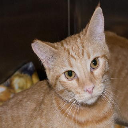

In [ ]:
cv2_imshow(resized)

In [ ]:
resized.shape

(128, 128, 3)

# Preprocessing

In [ ]:
path_to_dataset = "/content/drive/MyDrive/transfer_learning/catsanddogs/PetImages"

In [ ]:
categories = ["Cat", "Dog"]

In [ ]:
def normalize(x):
  x = (x-x.min())/(x.max()-x.min())
  return x

In [ ]:
images = []
errors_file = open("errors.txt", "a")
error = 0
number = 0

for category in categories:
  img_per_category = 0
  idx = categories.index(category)
  for image in os.listdir(f"{path_to_dataset}/{category}"):
    if img_per_category == 1000:
      break
    path_to_image = f"{path_to_dataset}/{category}/{image}"
    try:
      img = cv.imread(path_to_image, cv.IMREAD_COLOR)
      img = cv.resize(img, (128,128))
      img = normalize(img)
      images.append([img, idx])
      img_per_category += 1

    except Exception as e:
      error += 1
      errors_file.write(f"{error}) {e}\n")
    finally:
      number += 1
    print(f"\rProcessed: {number} | Errors: {error}", end="")

errors_file.close()

Processed: 2007 | Errors: 7

In [ ]:
with open("images_list.pickle", "wb") as f:
  pickle.dump(images, f)

In [ ]:
images[0][0].shape

(128, 128, 3)

In [ ]:
print(np.array(images)[:,1])

[0 0 0 ... 1 1 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [ ]:
for _ in range(10):
  random.shuffle(images)

In [ ]:
np.array(images)[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


array([1, 1, 1, ..., 0, 1, 0], dtype=object)

In [ ]:
X = []
y = []

for image, idx in images:
  X.append(image)
  y.append(idx)

In [ ]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [ ]:
X_train = X[:1600]
y_train = y[:1600]

X_val = X[1600:1800]
y_val = y[1600:1800]

X_test = X[1800:]
y_test = y[1800:]

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print(len(X_train))
print(len(y_train))

print(len(X_val))
print(len(y_val))

print(len(X_test))
print(len(y_test))

1600
1600
200
200
200
200


In [ ]:
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [ ]:
with open("X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)